In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tcc_ceds_music.csv")
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [4]:
len(['artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len'])

6

In [5]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']

In [6]:
len(['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'])

24

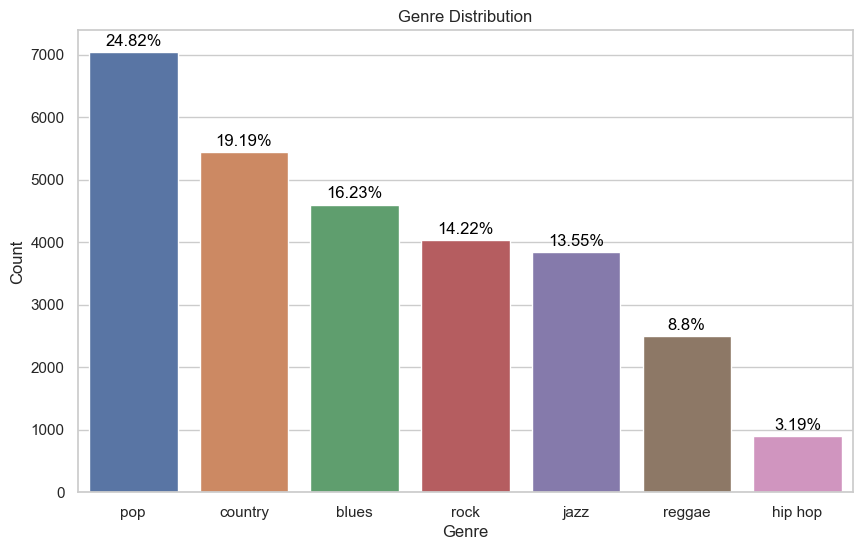

In [7]:
values = dict(df["genre"].value_counts())
total = sum(values.values())
percentages = {genre: count / total * 100 for genre, count in values.items()}

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=list(values.keys()), y=list(values.values()))
for i, count in enumerate(values.values()):
    percentage = round(percentages[list(values.keys())[i]], 2)
    ax.text(i,count+100, f"{percentage}%", ha='center', color="black")
    
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig("genre_distribution.png")

### Explore PCA and clustering based on features

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [9]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']

In [10]:
dfs = StandardScaler().fit_transform(df[features])

In [13]:
from umap import UMAP

umap = UMAP(n_components=2, init="random", random_state=0)
umap_data = umap.fit_transform(dfs)

c:\Users\anzek\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\anzek\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\anzek\AppData\Local\Programs\Python\Python3

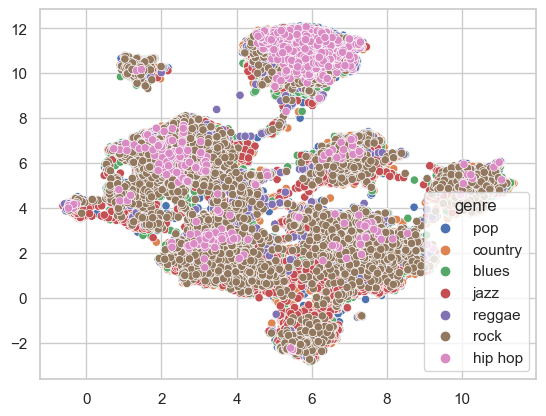

In [14]:
plt.figure()
df3 =df.copy()
df3["x"] = umap_data[:,0]
df3["y"] = umap_data[:,1]
sns.scatterplot(data=df3, x="x", y="y", hue="genre")
plt.xlabel("")
plt.ylabel("")
plt.savefig("umap-genres.png")

In [45]:
df_cluster = df3[["x", "y"]]

from sklearn.cluster import OPTICS, KMeans, AgglomerativeClustering, ward_tree, Birch, spectral_clustering

dbs = KMeans(n_clusters=9, n_init="auto")
dbs_data = dbs.fit_predict(dfs)
df3["cluster"] = dbs_data

Text(0, 0.5, '')

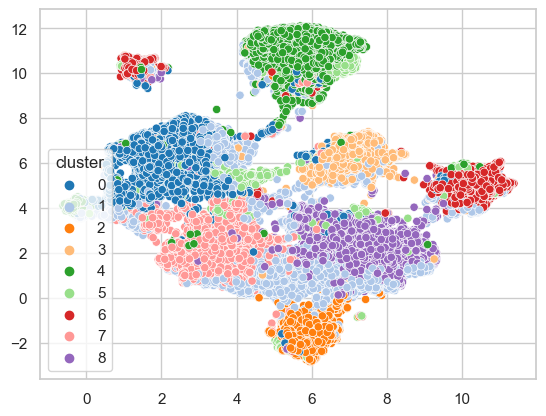

In [46]:
n_clusters = len(np.unique(dbs_data))

plt.figure()
plt.set_cmap("tab20")
sns.scatterplot(data=df3, x="x", y="y", hue="cluster", palette="tab20")
plt.xlabel("")
plt.ylabel("")
# plt.legend([],[], frameon=False)
#plt.savefig(f"umap-kmeans-{n_clusters}-genres.png")

In [51]:
df[df3["cluster"] == 7][df["release_date"] == 2019]

C:\Users\anzek\AppData\Local\Temp\ipykernel_6248\3639673839.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df3["cluster"] == 7][df["release_date"] == 2019]


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
6969,20047,gucci mane,ice (feat. gunna & lil baby),2019,pop,walk talk days days days think things forget t...,43,0.001462,0.001462,0.609970,...,0.001462,0.001462,0.865699,0.773248,0.193774,0.000000,0.371393,0.520506,world/life,0.014286
6982,20083,zayn,a whole new world (end title),2019,pop,world shin shimmer splendid tell princess hear...,82,0.000892,0.030994,0.556848,...,0.000892,0.000892,0.260262,0.704997,0.057730,0.000000,0.083883,0.414396,world/life,0.014286
7023,20210,nav,tap (feat. meek mill),2019,pop,cashxo weeknd trust issue remix weeknd kiss la...,118,0.001880,0.001880,0.357126,...,0.001880,0.042914,0.909022,0.733892,0.064858,0.000000,0.441467,0.676667,world/life,0.014286
7031,20242,jonas brothers,rollercoaster,2019,pop,nights fly nearly happiness begin days lift ha...,112,0.000877,0.000877,0.314777,...,0.045199,0.000877,0.688075,0.709458,0.058533,0.000000,0.456925,0.580567,world/life,0.014286
7037,20269,florida georgia line,simple,2019,pop,finger plus rocket science time hard true road...,104,0.000605,0.000605,0.582178,...,0.000605,0.000605,0.325246,0.818911,0.079417,0.000000,0.866035,0.882879,world/life,0.014286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27467,80960,imagine dragons,birds (feat. elisa),2019,rock,hearts valve pumpin blood flood body live life...,77,0.001053,0.064236,0.378336,...,0.001053,0.001053,0.612260,0.734431,0.021987,0.000000,0.277617,0.527513,world/life,0.014286
28312,82370,nappy roots,these walls (dirty mc edit),2019,hip hop,hmmmmmmmm wall closin long suppose grin lose f...,66,0.001645,0.329733,0.430797,...,0.001645,0.001645,0.603596,0.738456,0.160642,0.000000,0.600165,0.721713,world/life,0.014286
28333,82400,young mc,bust a move,2019,hip hop,world world world world world world world worl...,10,0.004785,0.004785,0.732057,...,0.004785,0.004785,0.957760,0.720970,0.051405,0.000002,0.741344,0.772766,world/life,0.014286
28358,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,0.118270,0.049952,0.885194,0.729098,0.364457,0.000000,0.689819,0.444427,world/life,0.014286


In [57]:
df3[df3["artist_name"] == "lauv"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,loudness,acousticness,instrumentalness,valence,energy,topic,age,x,y,cluster
6805,19587,lauv,i like me better,2017,pop,young york city know know good long drink york...,92,0.014352,0.000627,0.000627,...,0.718817,0.537148,0.000003,0.407461,0.505490,obscene,0.042857,6.894969,10.867144,4
6881,19817,lauv,enemies,2018,pop,think say good misunderstand lookin cold prete...,91,0.000711,0.050187,0.000711,...,0.795247,0.175702,0.000000,0.595012,0.693684,sadness,0.028571,8.127106,2.614564,8
7024,20211,lauv,i'm so tired...,2019,pop,tire songs tire songs tire songs tire wanna ho...,155,0.000349,0.082035,0.000349,...,0.733251,0.176706,0.000000,0.525969,0.733725,music,0.014286,6.387064,6.519525,3
